<a href="https://colab.research.google.com/github/HONAJIPHAD/Topic-Modeling-On-News-Article/blob/main/Topic_Modeling_On_News_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title : Extraction/identification of major topics & themes discussed in news articles.


##Problem Description

In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

##Data Description

The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/Capston Projects/New folder/bbc.csv')

#First Look of Data

In [4]:
data.head()

Unnamed: 0                                               news      type
0           0  Disney settles disclosure charges\n \n Walt Di...  business
1           1  Asia shares defy post-quake gloom\n \n Thailan...  business
2           2  India-Pakistan peace boosts trade\n \n Calmer ...  business
3           3  Quake's economic costs emerging\n \n Asian gov...  business
4           4  Ailing EuroDisney vows turnaround\n \n EuroDis...  business

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2225 non-null   int64 
 1   news        2225 non-null   object
 2   type        2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


In [6]:
data.shape

(2225, 3)

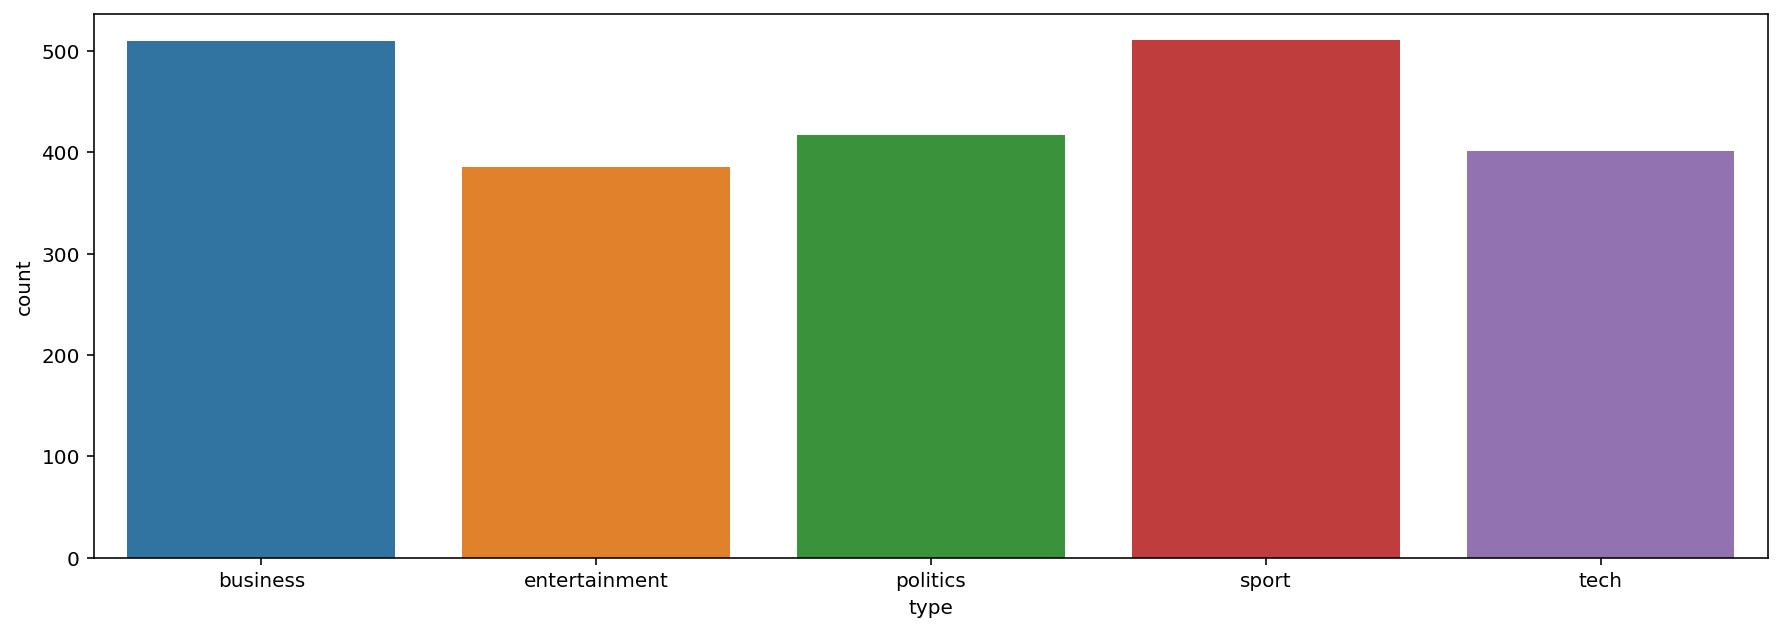

In [7]:
plt.figure(figsize=(15, 5))
sns.countplot(data.type)

In [8]:
data['News_length'] = data['news'].str.len()
print(data['News_length'])

0       1766
1       3339
2       1558
3       2674
4       1155
        ... 
2220    4062
2221    2586
2222    1939
2223    3259
2224    3085
Name: News_length, Length: 2225, dtype: int64


In [9]:
data.head()

Unnamed: 0                                               news      type  \
0           0  Disney settles disclosure charges\n \n Walt Di...  business   
1           1  Asia shares defy post-quake gloom\n \n Thailan...  business   
2           2  India-Pakistan peace boosts trade\n \n Calmer ...  business   
3           3  Quake's economic costs emerging\n \n Asian gov...  business   
4           4  Ailing EuroDisney vows turnaround\n \n EuroDis...  business   

   News_length  
0         1766  
1         3339  
2         1558  
3         2674  
4         1155

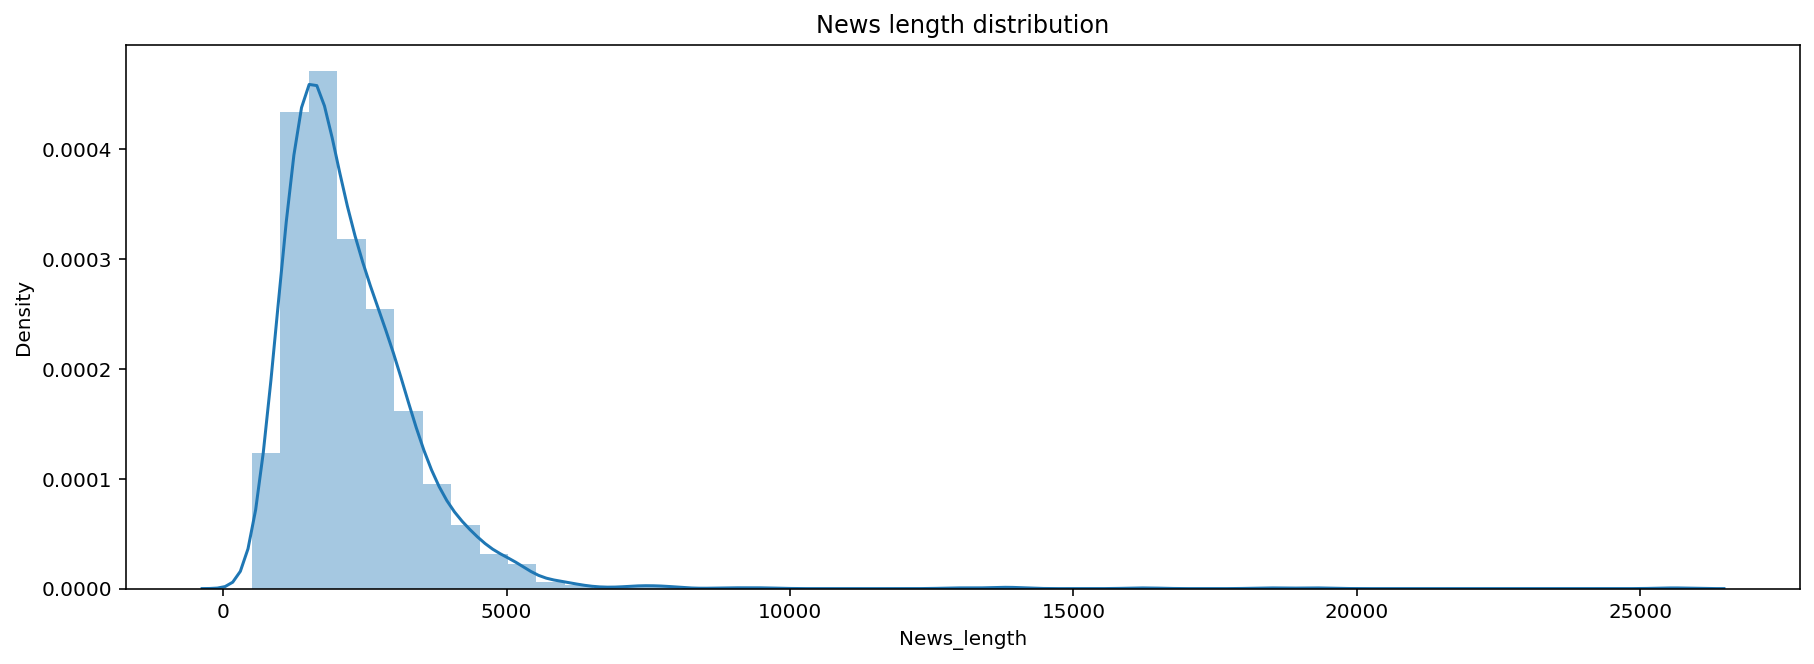

In [10]:
plt.figure(figsize=(15, 5))
sns.distplot(data['News_length']).set_title('News length distribution');

#Funtion to remove punctuation

In [11]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [12]:
data['news'] = data['news'].apply(remove_punctuation)
data.head(10)

Unnamed: 0                                               news      type  \
0           0  Disney settles disclosure charges\n \n Walt Di...  business   
1           1  Asia shares defy postquake gloom\n \n Thailand...  business   
2           2  IndiaPakistan peace boosts trade\n \n Calmer r...  business   
3           3  Quakes economic costs emerging\n \n Asian gove...  business   
4           4  Ailing EuroDisney vows turnaround\n \n EuroDis...  business   
5           5  Fresh hope after Argentine crisis\n \n Three y...  business   
6           6  US to probe airline travel chaos\n \n The US g...  business   
7           7  Green reports shun supply chain\n \n Nearly 20...  business   
8           8  Durex maker SSL awaits firm bid\n \n UK condom...  business   
9           9  Fosters buys stake in winemaker\n \n Australia...  business   

   News_length  
0         1766  
1         3339  
2         1558  
3         2674  
4         1155  
5         5233  
6         3090  
7         2146  
8         1325  
9         2628

#Removeing Stop Words From Data

In [13]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
sw = stopwords[:]

In [15]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [16]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [17]:
data['news'] = data['news'].apply(stopwords)
data.head(10)

Unnamed: 0                                               news      type  \
0           0  disney settles disclosure charges walt disney ...  business   
1           1  asia shares defy postquake gloom thailand beco...  business   
2           2  indiapakistan peace boosts trade calmer relati...  business   
3           3  quakes economic costs emerging asian governmen...  business   
4           4  ailing eurodisney vows turnaround eurodisney e...  business   
5           5  fresh hope argentine crisis three years argent...  business   
6           6  us probe airline travel chaos us government in...  business   
7           7  green reports shun supply chain nearly 20 uk t...  business   
8           8  durex maker ssl awaits firm bid uk condom make...  business   
9           9  fosters buys stake winemaker australian brewer...  business   

   News_length  
0         1766  
1         3339  
2         1558  
3         2674  
4         1155  
5         5233  
6         3090  
7         2146  
8         1325  
9         2628

#Collect vocabulary count

In [18]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['news'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [19]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

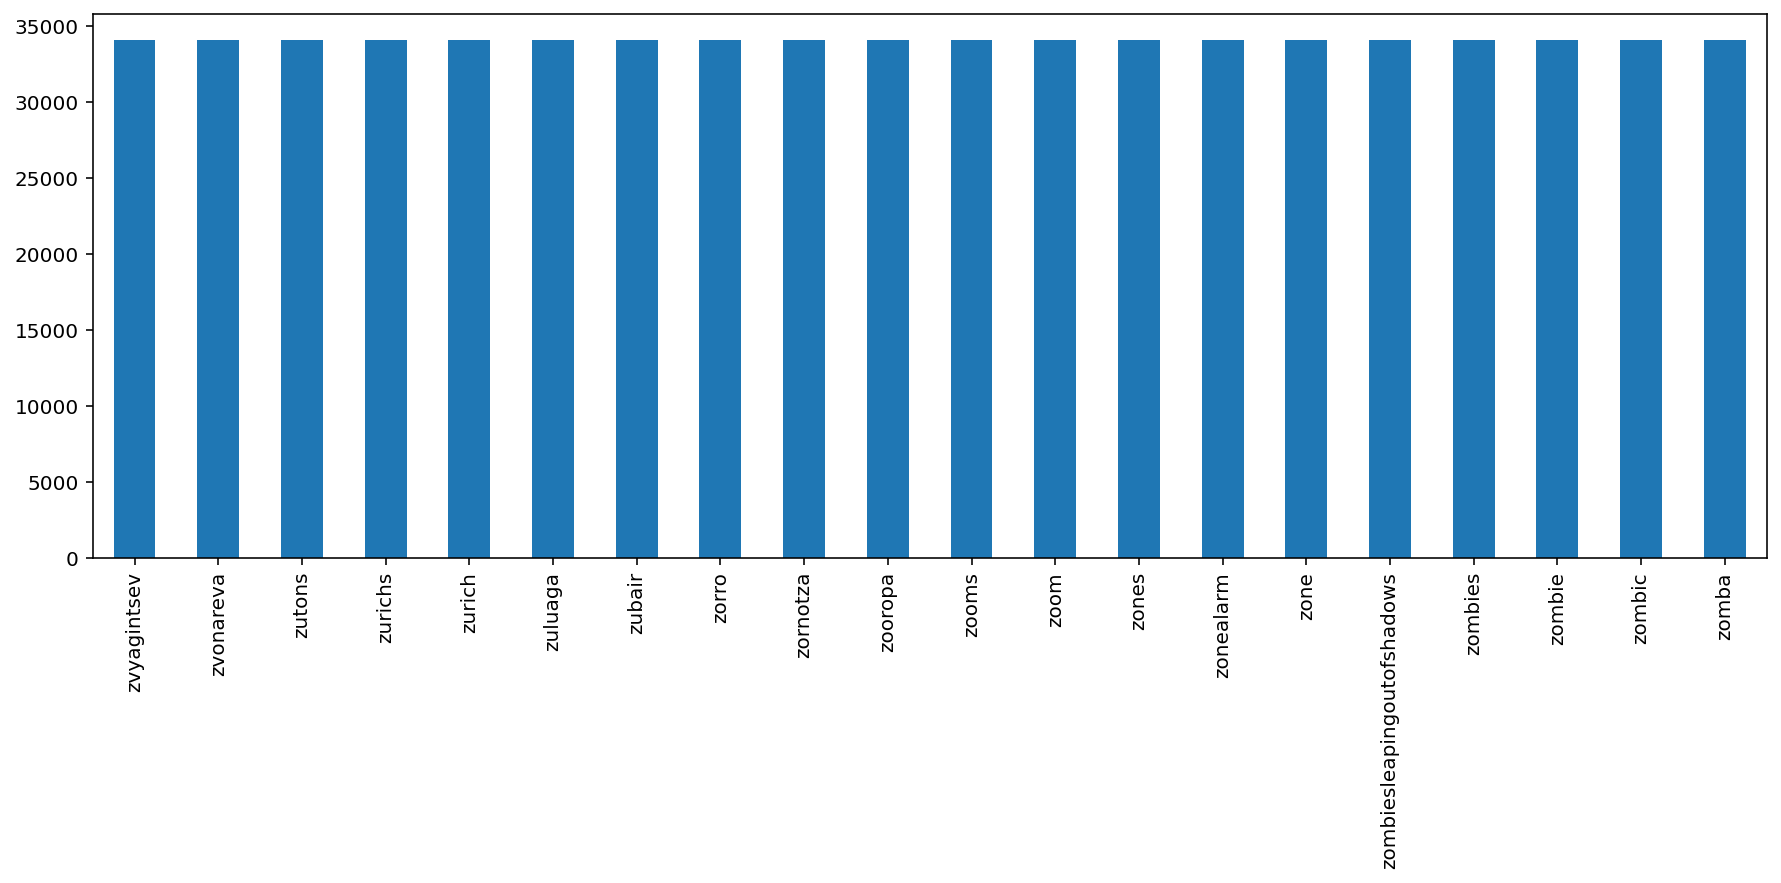

In [20]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

#Stemming

In [21]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [22]:
data['news'] = data['news'].apply(stemming)
data.head(10)

Unnamed: 0                                               news      type  \
0           0  disney settl disclosur charg walt disney settl...  business   
1           1  asia share defi postquak gloom thailand becom ...  business   
2           2  indiapakistan peac boost trade calmer relat in...  business   
3           3  quak econom cost emerg asian govern intern age...  business   
4           4  ail eurodisney vow turnaround eurodisney europ...  business   
5           5  fresh hope argentin crisi three year argentina...  business   
6           6  us probe airlin travel chao us govern investig...  business   
7           7  green report shun suppli chain near 20 uk top ...  business   
8           8  durex maker ssl await firm bid uk condom maker...  business   
9           9  foster buy stake winemak australian brewer fos...  business   

   News_length  
0         1766  
1         3339  
2         1558  
3         2674  
4         1155  
5         5233  
6         3090  
7         2146  
8         1325  
9         2628

In [23]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

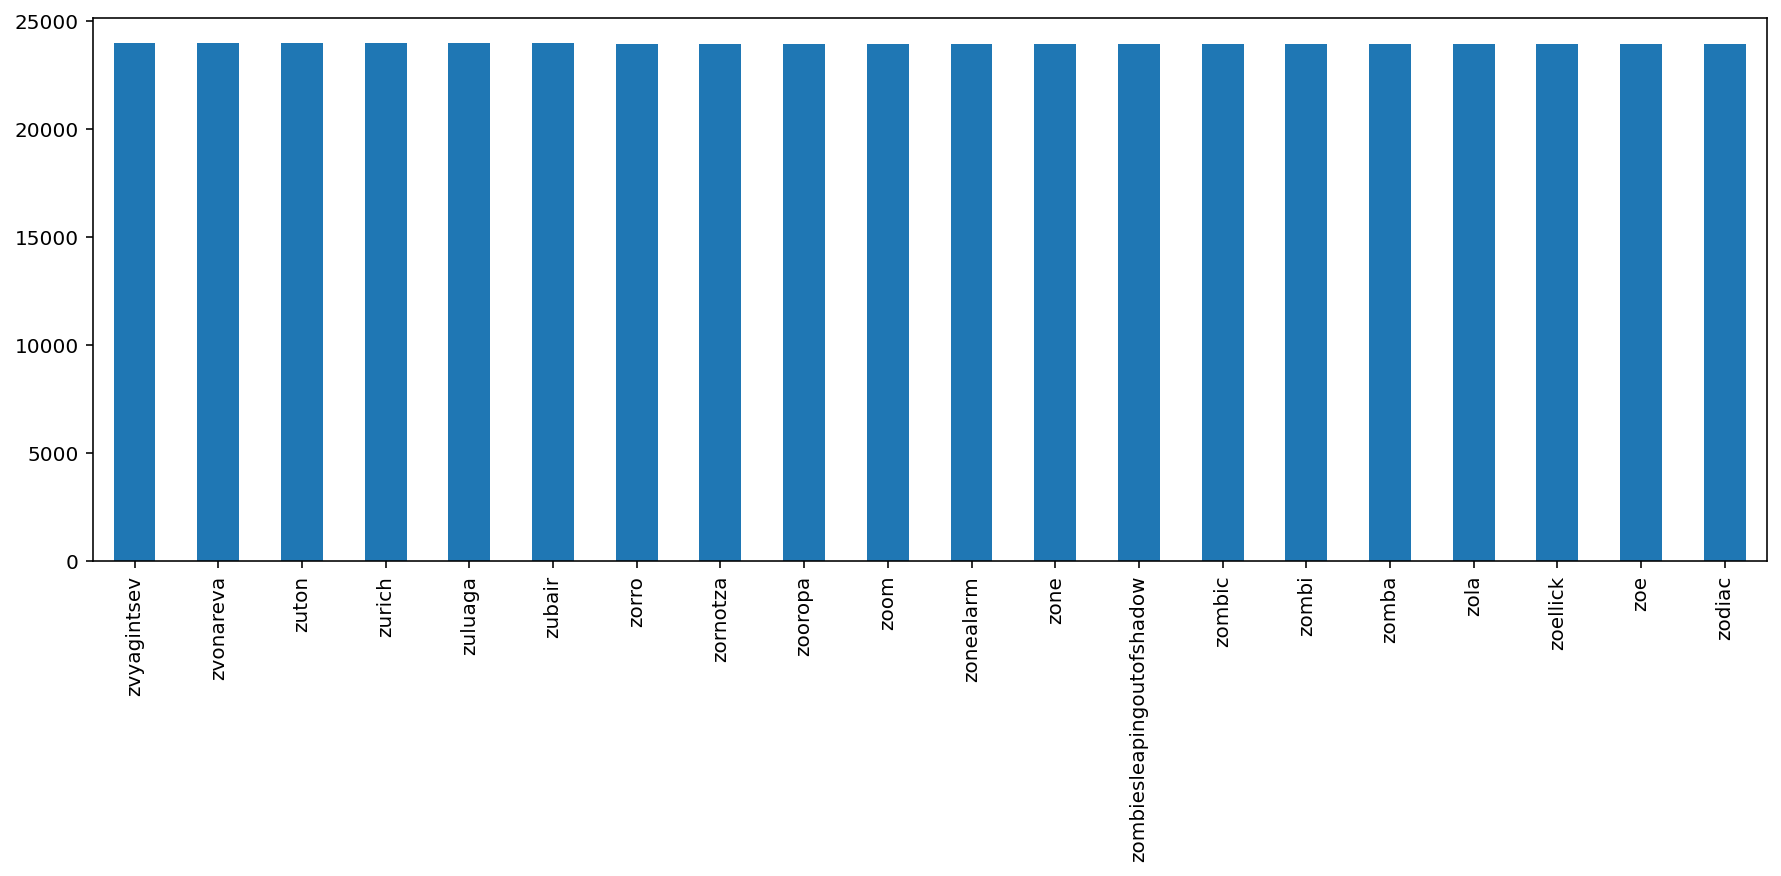

In [24]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

In [25]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [26]:
data['length'] = data['news'].apply(length)
data.head(10)

Unnamed: 0                                               news      type  \
0           0  disney settl disclosur charg walt disney settl...  business   
1           1  asia share defi postquak gloom thailand becom ...  business   
2           2  indiapakistan peac boost trade calmer relat in...  business   
3           3  quak econom cost emerg asian govern intern age...  business   
4           4  ail eurodisney vow turnaround eurodisney europ...  business   
5           5  fresh hope argentin crisi three year argentina...  business   
6           6  us probe airlin travel chao us govern investig...  business   
7           7  green report shun suppli chain near 20 uk top ...  business   
8           8  durex maker ssl await firm bid uk condom maker...  business   
9           9  foster buy stake winemak australian brewer fos...  business   

   News_length  length  
0         1766    1125  
1         3339    2136  
2         1558    1007  
3         2674    1697  
4         1155     801  
5         5233    3018  
6         3090    2003  
7         2146    1341  
8         1325     889  
9         2628    1734

In [27]:
Business_data = data[data['type'] == 'business']
Entertainment_data = data[data['type'] == 'entertainment']
Politics_data = data[data['type'] == 'politics']
Sport_data = data[data['type'] == 'sport']
Tech_data = data[data['type'] == 'tech']

In [28]:
Business_data

Unnamed: 0                                               news      type  \
0             0  disney settl disclosur charg walt disney settl...  business   
1             1  asia share defi postquak gloom thailand becom ...  business   
2             2  indiapakistan peac boost trade calmer relat in...  business   
3             3  quak econom cost emerg asian govern intern age...  business   
4             4  ail eurodisney vow turnaround eurodisney europ...  business   
..          ...                                                ...       ...   
505         505  japanes bank battl end japan sumitomo mitsui f...  business   
506         506  china keep tight rein credit china effort stop...  business   
507         507  rover deal may cost 2000 job 2000 job mg rover...  business   
508         508  mix reaction man utd offer share manchest unit...  business   
509         509  id theft surg hit us consum almost quarter mil...  business   

     News_length  length  
0           1766    1125  
1           3339    2136  
2           1558    1007  
3           2674    1697  
4           1155     801  
..           ...     ...  
505         1743    1102  
506         1397     857  
507         1787    1120  
508         2736    1649  
509         1564    1034  

[510 rows x 5 columns]

#Count of words in Business data

In [29]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Business_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

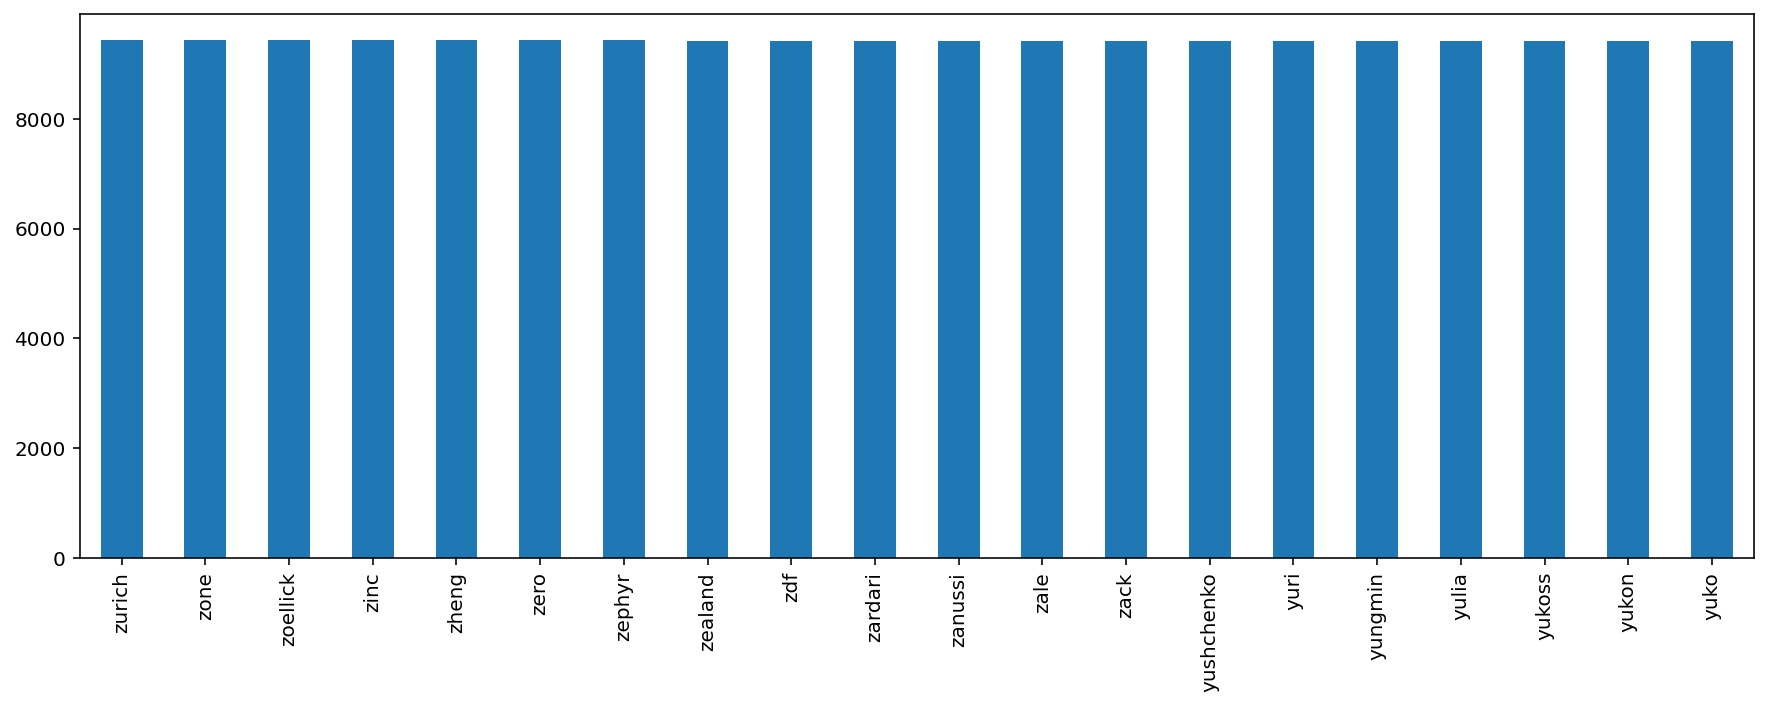

In [30]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

#Count of words in Entertainment data

In [31]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Entertainment_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

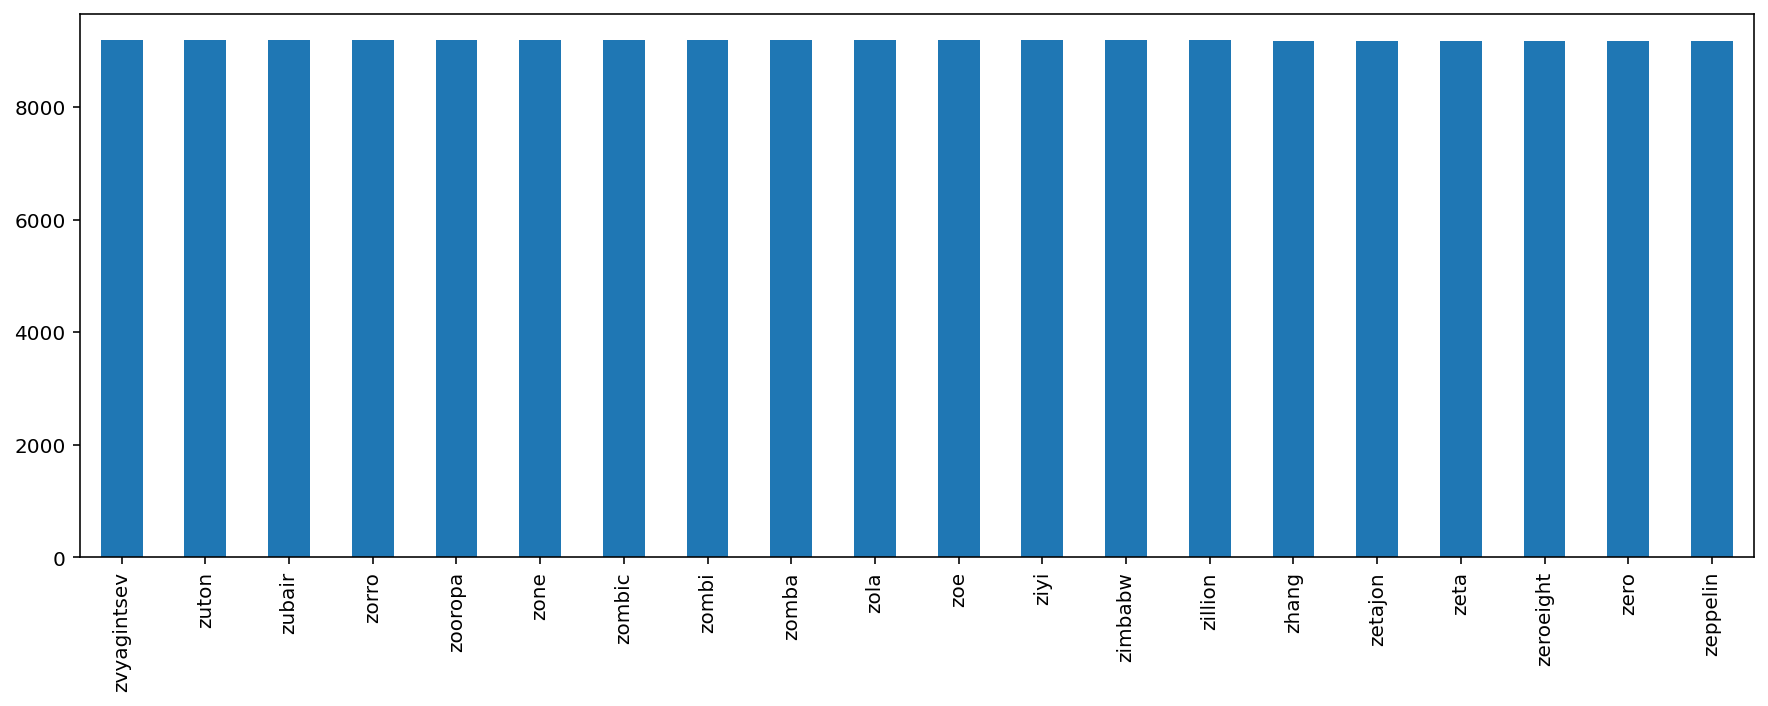

In [32]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

#Count of words in Politics data

In [33]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Politics_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

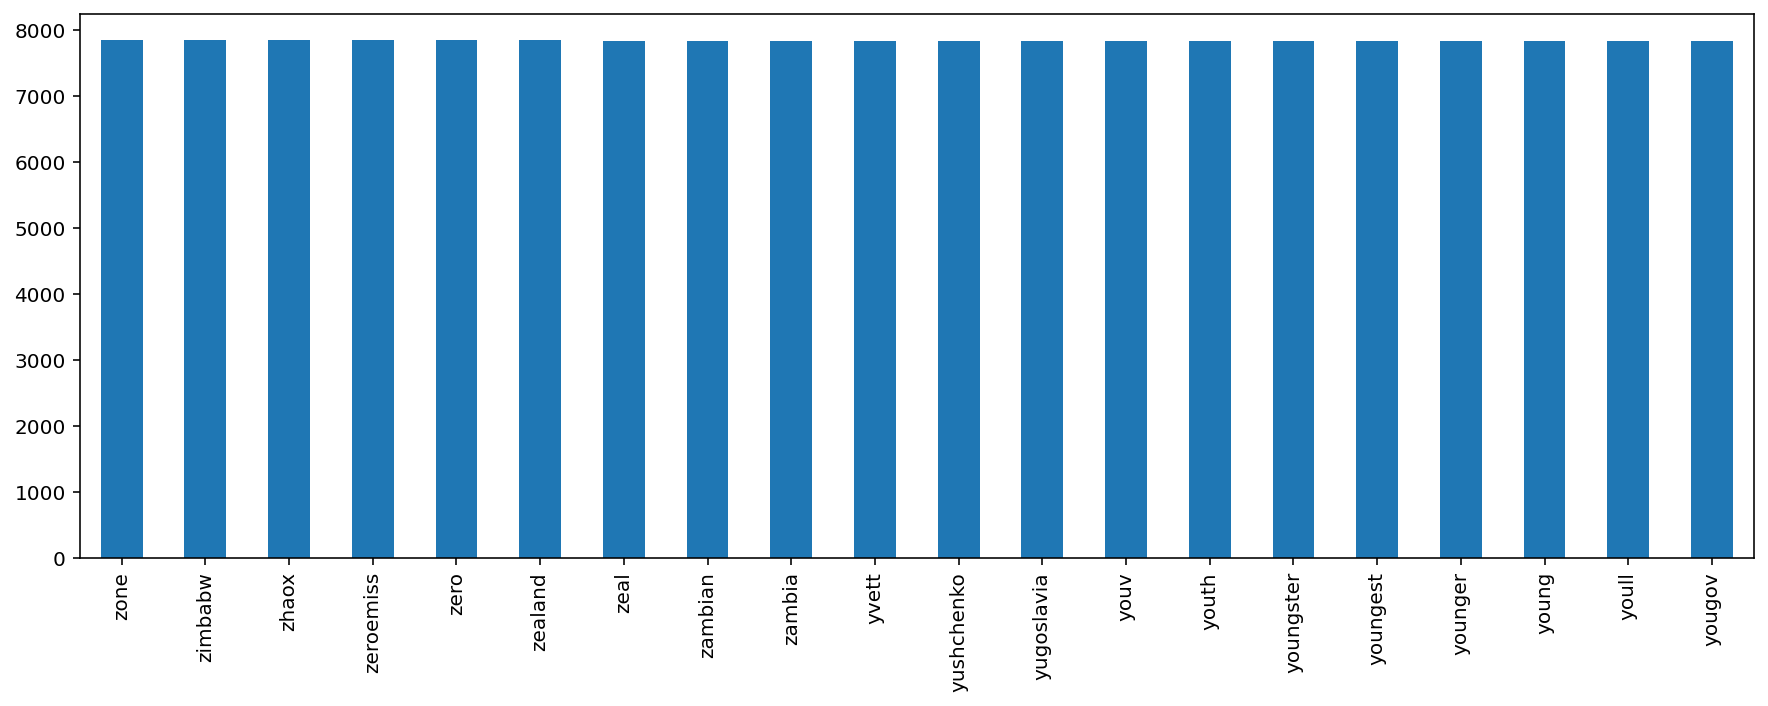

In [34]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

#Count of words in Sport data

In [35]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Sport_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

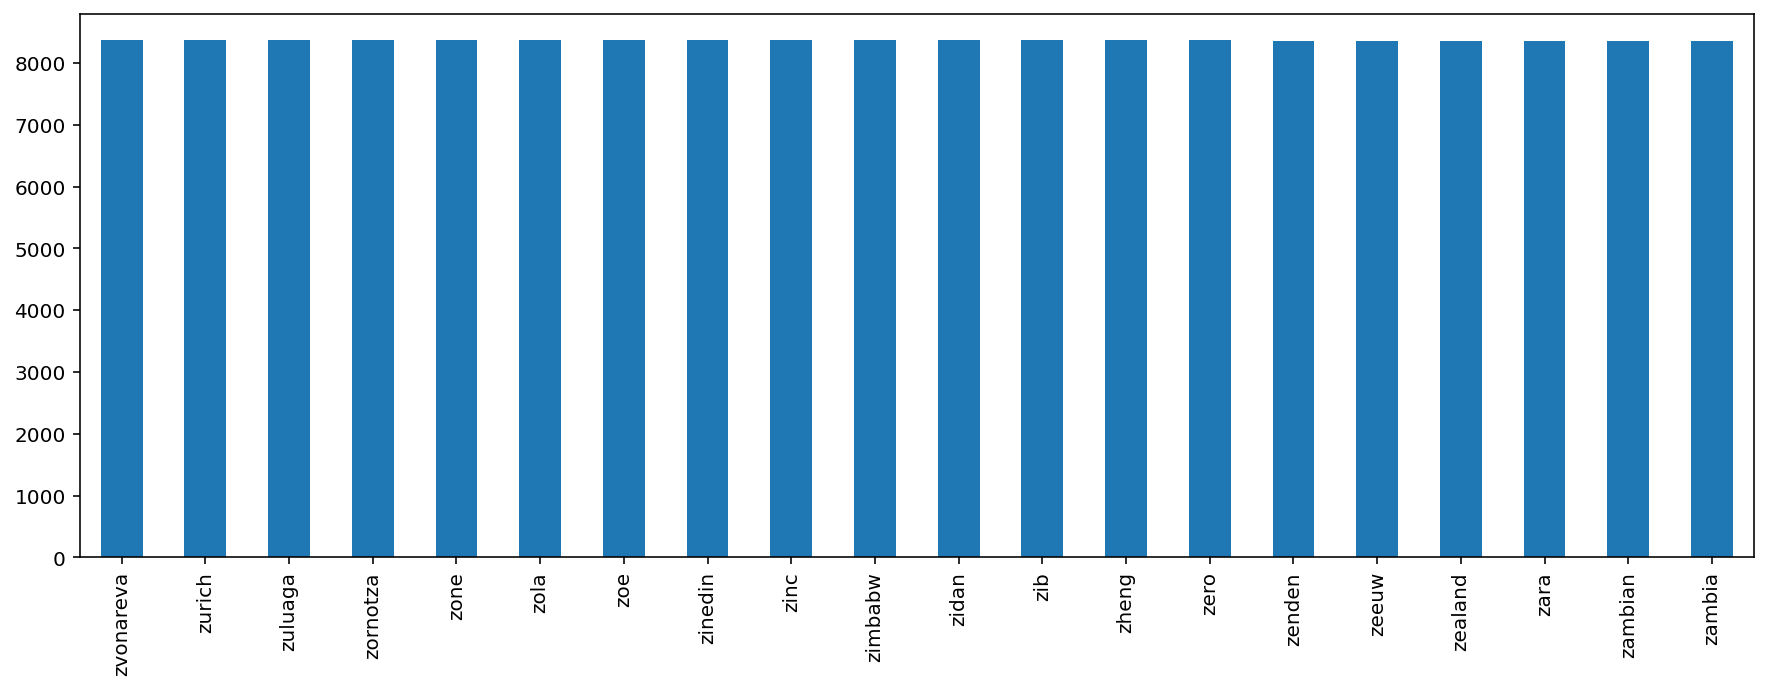

In [36]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

#Count of words in Tech data

In [37]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Tech_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

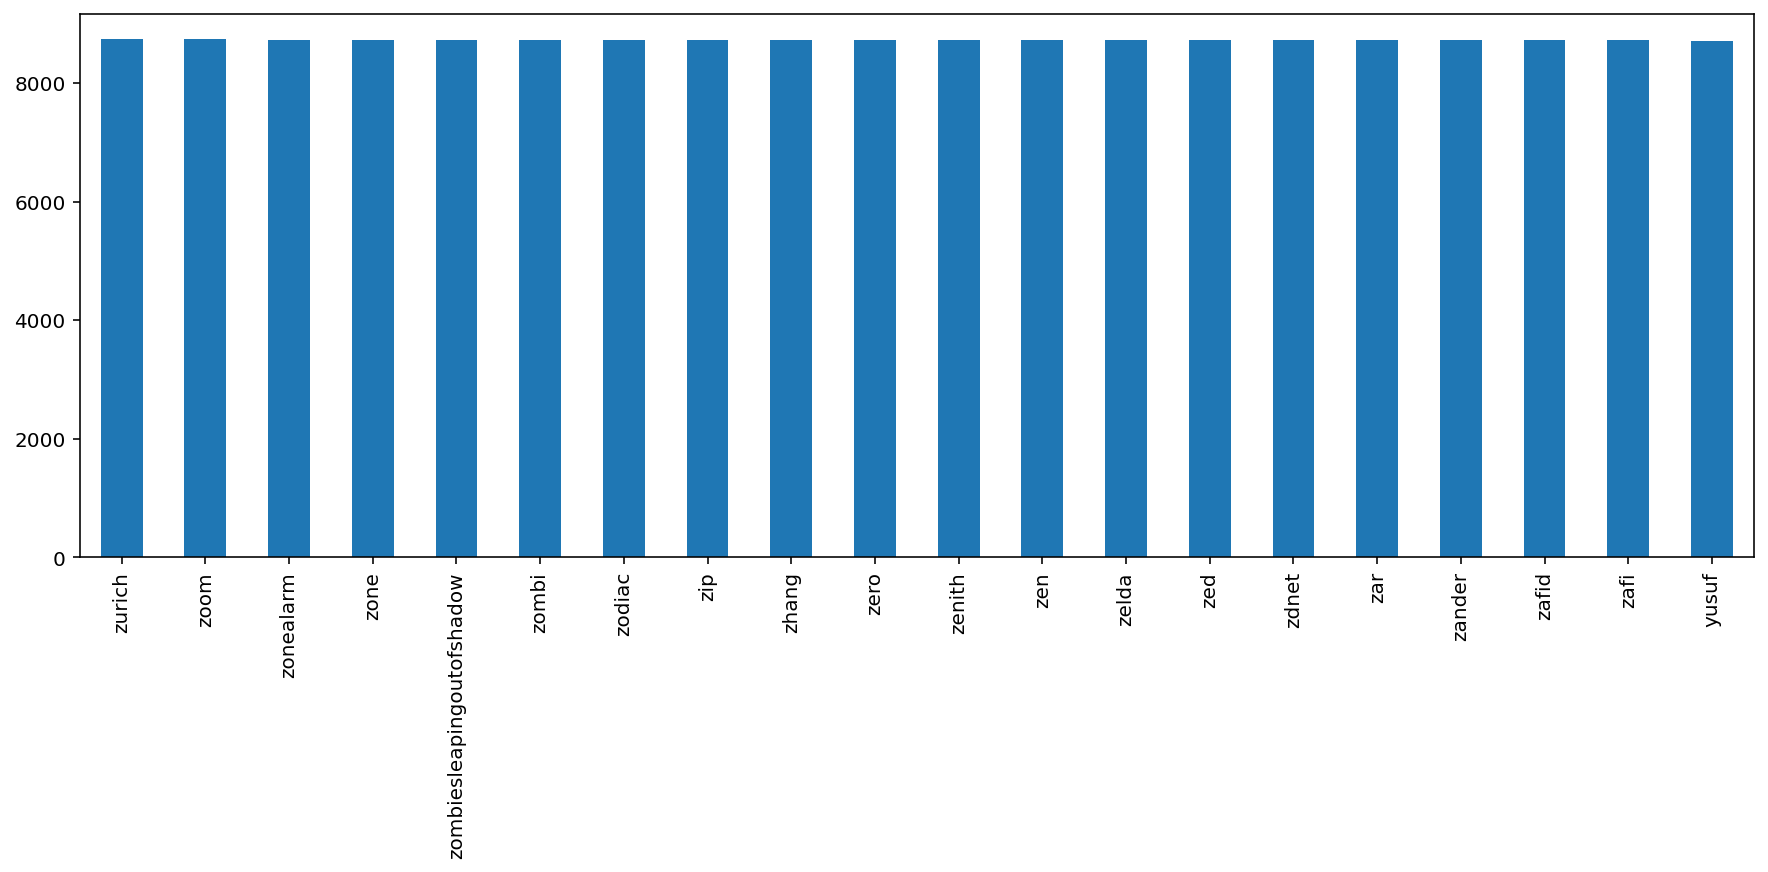

In [38]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

#Word Cloud

In [41]:
from wordcloud import WordCloud ,STOPWORDS

In [39]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

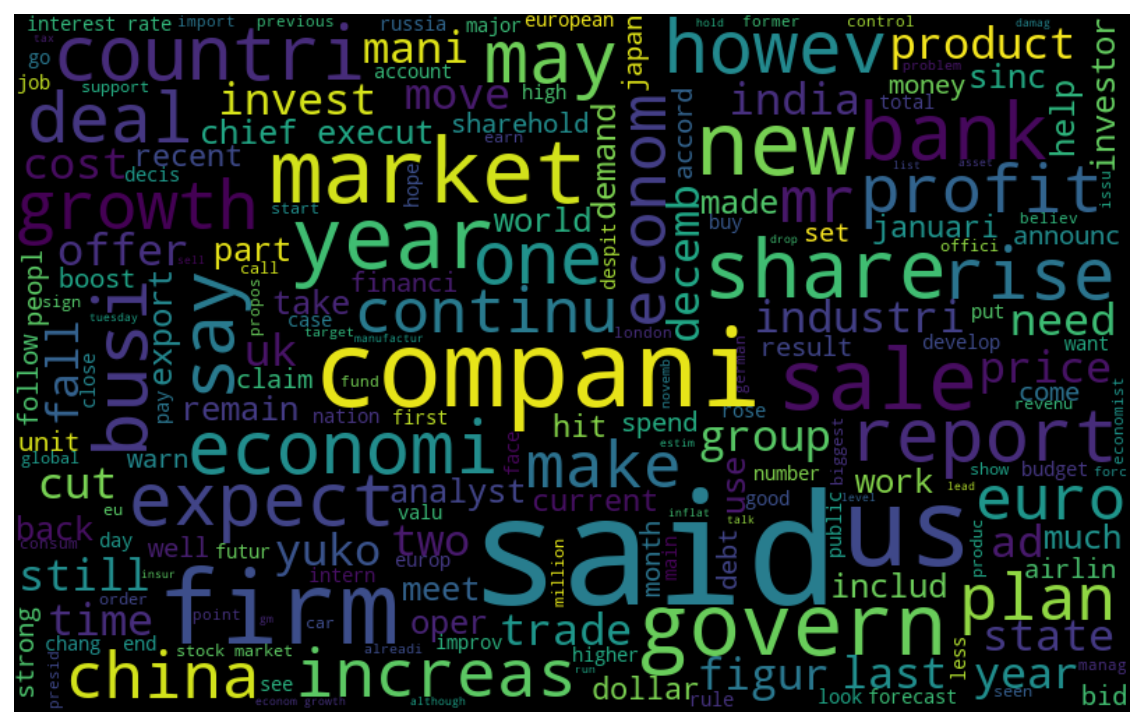

In [42]:
subset=data[data.type=="business"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

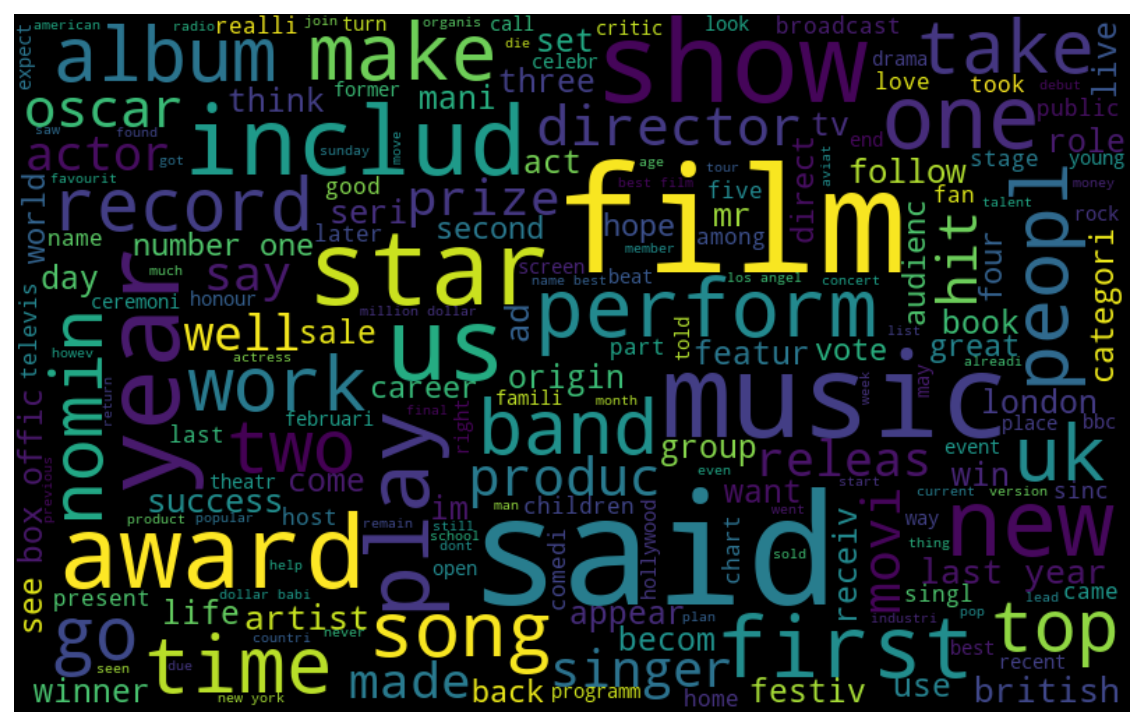

In [43]:
subset=data[data.type=="entertainment"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

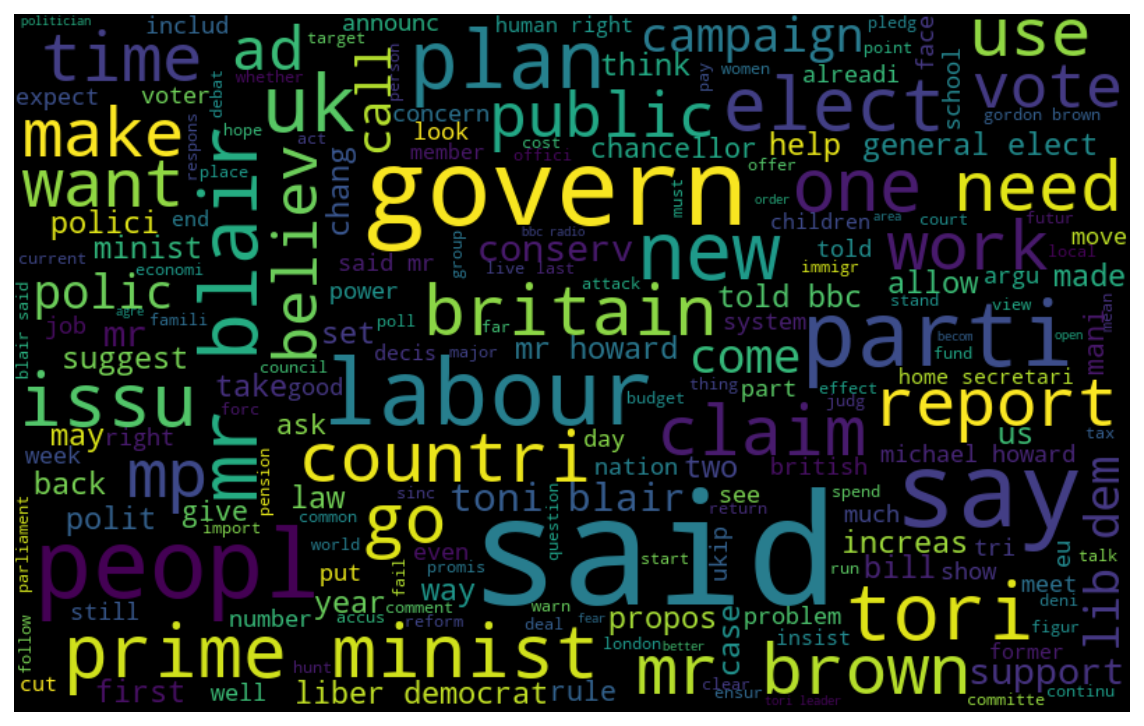

In [44]:
subset=data[data.type=="politics"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

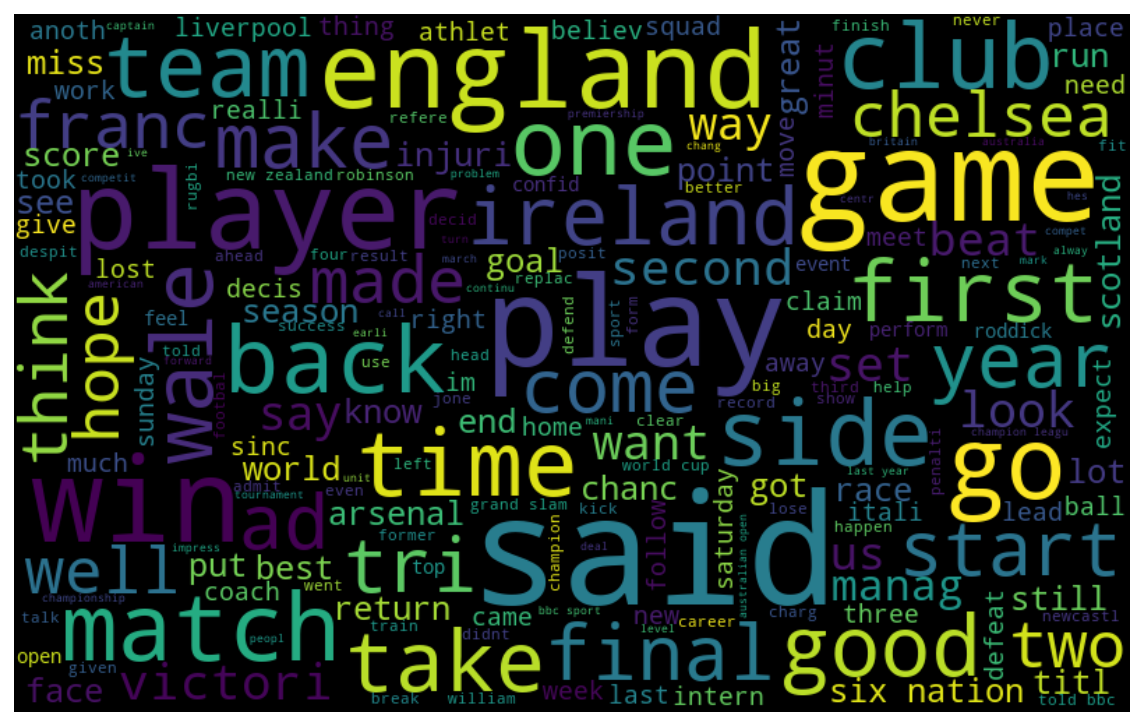

In [45]:
subset=data[data.type=="sport"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

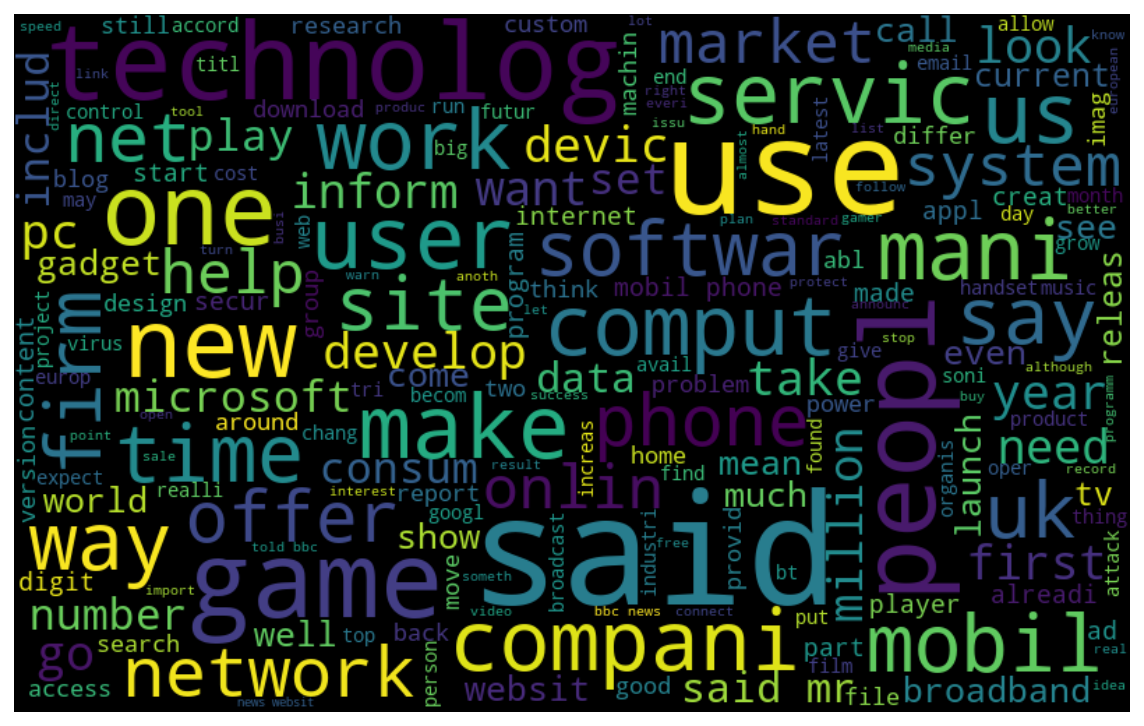

In [46]:
subset=data[data.type=="tech"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

#Topic Modeling

In [47]:
df = data.copy()

In [48]:
df.head()

Unnamed: 0                                               news      type  \
0           0  disney settl disclosur charg walt disney settl...  business   
1           1  asia share defi postquak gloom thailand becom ...  business   
2           2  indiapakistan peac boost trade calmer relat in...  business   
3           3  quak econom cost emerg asian govern intern age...  business   
4           4  ail eurodisney vow turnaround eurodisney europ...  business   

   News_length  length  
0         1766    1125  
1         3339    2136  
2         1558    1007  
3         2674    1697  
4         1155     801

In [49]:
df2 = df[['news']]

In [50]:
df2.head()

news
0  disney settl disclosur charg walt disney settl...
1  asia share defi postquak gloom thailand becom ...
2  indiapakistan peac boost trade calmer relat in...
3  quak econom cost emerg asian govern intern age...
4  ail eurodisney vow turnaround eurodisney europ...

In [51]:
vectorizer = TfidfVectorizer(max_df=0.8, max_features=8000,min_df=0.05)

In [52]:
matrix=vectorizer.fit_transform(df2['news'])

In [53]:
df1 = pd.DataFrame(matrix.todense() , columns=vectorizer.get_feature_names())

In [54]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}
model=LatentDirichletAllocation()
lda_model = GridSearchCV(model,param_grid=grid_params)
lda_model.fit(matrix)
best_lda_model = lda_model.best_estimator_
print("Best LDA model's params" , lda_model.best_params_)

Best LDA model's params {'n_components': 5}


In [55]:
lda_topic_matrix= best_lda_model.transform(matrix)

In [56]:
doc = pd.DataFrame(best_lda_model.transform(matrix))

In [57]:
doc.columns=['topic1','topic2','topic3','topic4','topic5']

In [58]:
from collections import Counter
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [59]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [80]:
from sklearn.manifold import TSNE
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2225 samples in 0.002s...
[t-SNE] Computed neighbors for 2225 samples in 0.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2225
[t-SNE] Computed conditional probabilities for sample 2000 / 2225
[t-SNE] Computed conditional probabilities for sample 2225 / 2225
[t-SNE] Mean sigma: 0.003651
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.186699
[t-SNE] KL divergence after 2000 iterations: 0.214181


In [82]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [83]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model,matrix,vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  22.985380
3       51.163364 -159.968018       2        1  22.879460
0      -73.144554   21.523815       3        1  20.743940
4      -66.410133 -110.606438       4        1  19.787522
2       54.417324   12.443444       5        1  13.603698, topic_info=       Term        Freq       Total Category  logprob  loglift
251    film   71.000000   71.000000  Default  30.0000  30.0000
65    award   44.000000   44.000000  Default  29.0000  29.0000
351  labour   41.000000   41.000000  Default  28.0000  28.0000
79     best   47.000000   47.000000  Default  27.0000  27.0000
422      mr  104.000000  104.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
701    year   17.527990   86.191959   Topic5  -4.7785   0.4021
569     set   12.345296   39.436449   Topic5  -5.1291   0.8334
353    last   12.087557   55.520089   Topic5  -5.1502   0.4703
446     one   12.057310   59.895697   Topic5  -5.1527   0.3919
424   music   11.258648   46.109197   Topic5  -5.2212   0.5850

[252 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
10        1  0.595174  2004
10        2  0.056683  2004
10        3  0.028342  2004
10        4  0.170050  2004
10        5  0.141708  2004
...     ...       ...   ...
701       1  0.359662  year
701       2  0.185632  year
701       3  0.116020  year
701       4  0.139224  year
701       5  0.208836  year

[770 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 5, 3])

#Lable Encoding

In [5]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['type']= label_encoder.fit_transform(data['type']) 

In [6]:
data.head()

Unnamed: 0                                               news  type
0           0  Disney settles disclosure charges\n \n Walt Di...     0
1           1  Asia shares defy post-quake gloom\n \n Thailan...     0
2           2  India-Pakistan peace boosts trade\n \n Calmer ...     0
3           3  Quake's economic costs emerging\n \n Asian gov...     0
4           4  Ailing EuroDisney vows turnaround\n \n EuroDis...     0

#Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['news'], 
                                                    data['type'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [8]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [9]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

[[0.10887178 0.         0.         ... 0.14692673 0.         0.        ]
 [0.         0.         0.09893442 ... 0.13147577 0.         0.        ]
 [0.         0.         0.12331825 ... 0.17920438 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.06607669 0.         0.        ]
 [0.         0.07243832 0.13545594 ... 0.         0.05998423 0.        ]
 [0.1703474  0.10519252 0.         ... 0.         0.         0.        ]]
(445, 300)


#Implementation of Various models

##Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
predicted_train = model.predict(features_train)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9258426966292135
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       118
           1       0.96      0.89      0.92        75
           2       0.95      0.93      0.94        85
           3       0.95      0.99      0.97        91
           4       0.90      0.87      0.89        76

    accuracy                           0.93       445
   macro avg       0.93      0.92      0.93       445
weighted avg       0.93      0.93      0.93       445



In [11]:
print (classification_report(labels_train,predicted_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       392
           1       1.00      1.00      1.00       311
           2       1.00      1.00      1.00       332
           3       1.00      1.00      1.00       420
           4       1.00      1.00      1.00       325

    accuracy                           1.00      1780
   macro avg       1.00      1.00      1.00      1780
weighted avg       1.00      1.00      1.00      1780



##Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
predicted_train = model.predict(features_train)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9325842696629213
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       118
           1       0.93      0.87      0.90        75
           2       0.96      0.95      0.96        85
           3       0.96      0.99      0.97        91
           4       0.94      0.89      0.92        76

    accuracy                           0.93       445
   macro avg       0.94      0.93      0.93       445
weighted avg       0.93      0.93      0.93       445



In [13]:
print (classification_report(labels_train,predicted_train))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       392
           1       0.97      0.96      0.97       311
           2       0.95      0.97      0.96       332
           3       0.99      0.99      0.99       420
           4       0.97      0.94      0.95       325

    accuracy                           0.96      1780
   macro avg       0.96      0.96      0.96      1780
weighted avg       0.96      0.96      0.96      1780



##K Neighbors Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
predicted_train = model.predict(features_train)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9123595505617977
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       118
           1       0.91      0.84      0.87        75
           2       0.82      0.94      0.88        85
           3       0.98      0.93      0.96        91
           4       0.91      0.88      0.89        76

    accuracy                           0.91       445
   macro avg       0.91      0.91      0.91       445
weighted avg       0.92      0.91      0.91       445



In [15]:
print (classification_report(labels_train,predicted_train))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       392
           1       0.95      0.96      0.95       311
           2       0.91      0.95      0.93       332
           3       0.99      0.96      0.97       420
           4       0.93      0.94      0.94       325

    accuracy                           0.95      1780
   macro avg       0.94      0.95      0.94      1780
weighted avg       0.95      0.95      0.95      1780



##Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
predicted_train = model.predict(features_train)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7662921348314606
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       118
           1       0.73      0.73      0.73        75
           2       0.74      0.71      0.72        85
           3       0.87      0.85      0.86        91
           4       0.66      0.83      0.73        76

    accuracy                           0.77       445
   macro avg       0.76      0.77      0.76       445
weighted avg       0.77      0.77      0.77       445



In [17]:
print (classification_report(labels_train,predicted_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       392
           1       1.00      1.00      1.00       311
           2       1.00      1.00      1.00       332
           3       1.00      1.00      1.00       420
           4       1.00      1.00      1.00       325

    accuracy                           1.00      1780
   macro avg       1.00      1.00      1.00      1780
weighted avg       1.00      1.00      1.00      1780



##Naive Bayes Classifier

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
predicted_train = model.predict(features_train)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8831460674157303
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       118
           1       0.86      0.81      0.84        75
           2       0.94      0.92      0.93        85
           3       0.84      0.96      0.90        91
           4       0.81      0.91      0.86        76

    accuracy                           0.88       445
   macro avg       0.88      0.89      0.88       445
weighted avg       0.89      0.88      0.88       445



In [19]:
print (classification_report(labels_train,predicted_train))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       392
           1       0.92      0.87      0.89       311
           2       0.94      0.91      0.92       332
           3       0.89      0.98      0.93       420
           4       0.82      0.95      0.88       325

    accuracy                           0.90      1780
   macro avg       0.90      0.90      0.90      1780
weighted avg       0.91      0.90      0.90      1780



#Conclusion

The news is almost every second used in different sources of media in soft and hard.

Due to impact of social media everyone is referring to online news platform. News classification became important aspect.

We get maximum accuracy with KNN classifier and Logistic regression with train and test accuracy as 0.96,0.95 and 0.98,0.95 respectively.

As per the working of KNN classifier we would like implement it on News classification.